# WH Visualizations

### This script contains the following:
#### 1. Import data and libraries
#### 2. Analyze and visualize

## 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Define path

path = r'/Users/giadairene/Documents/CareerFoundry Data Analytics/Data Analytics Immersion/Achievement 6/World_Happiness_Analysis'

In [4]:
# Import world happiness data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Happiness_combined_all_years.csv'), index_col = 0)

In [5]:
df.head()

,Country,Region,Year,Happiness_rank,Happiness_score,GDP_capita,Social_support,Life_expectancy,Freedom,Generosity,Corruption_perception
0,Finland,Western Europe,2019,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,Western Europe,2019,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,Western Europe,2019,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,Western Europe,2019,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,Western Europe,2019,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [6]:
df.shape

(741, 11)

## 2. Analyze & Visualize

In [7]:
# Group by 'Year' and count the number of entries in 'Country' for each year

country_counts = df.groupby('Year')['Country'].size().reset_index(name='Count')
country_counts

,Year,Count
0,2019,156
1,2020,153
2,2021,149
3,2022,146
4,2023,137


From the table shown as above, the number of countries involved in this dataset for different year is different. Therefore, it is necessary to make an **intersection** of them to get the most common country list.

In [8]:
# Filtering the dataset for each year

Country_19 = df[df['Year'] == 2019]['Country']
Country_20 = df[df['Year'] == 2020]['Country']
Country_21 = df[df['Year'] == 2021]['Country']
Country_22 = df[df['Year'] == 2022]['Country']
Country_23 = df[df['Year'] == 2023]['Country']

In [9]:
# Finding the intersection of all country lists

common_country = set(Country_19) & set(Country_20) & set(Country_21) & set(Country_22) & set(Country_23)

In [10]:
# Calculating the number of common countries

len(common_country)

132

There are 132 countries’ data existing across from 2019-2023 in this dataset. Then we need to filter the original dataset by this common_country list.

In [11]:
# Filter df by common_country list

df_common = df[df['Country'].isin(common_country)]

In [12]:
df_common

,Country,Region,Year,Happiness_rank,Happiness_score,GDP_capita,Social_support,Life_expectancy,Freedom,Generosity,Corruption_perception
0,Finland,Western Europe,2019,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,Western Europe,2019,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,Western Europe,2019,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,Western Europe,2019,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,Western Europe,2019,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...,...,...
735,Botswana,Sub-Saharan Africa,2023,132,3.435,1.471,1.041,0.087,0.480,0.021,0.071
737,Zimbabwe,Sub-Saharan Africa,2023,134,3.204,0.758,0.881,0.069,0.363,0.112,0.117
738,Sierra Leone,Sub-Saharan Africa,2023,135,3.138,0.670,0.540,0.092,0.371,0.193,0.051
739,Lebanon,Middle East and North Africa,2023,136,2.392,1.417,0.476,0.398,0.123,0.061,0.027


In [13]:
# Export df_common

df_common.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Common_countries_all_years.csv'))

### Top 10 Average Happiness Score from 2019-2023 by Country and Region

In [14]:
# Calculate the average happiness score for each country across all years

avg_happiness = df_common.groupby('Country')['Happiness_score'].mean().reset_index()

In [15]:
# Rename the column for clarity

avg_happiness.rename(columns={'Happiness_score': 'avg_score'}, inplace=True)

In [16]:
avg_happiness

,Country,avg_score
0,Afghanistan,2.51118
1,Albania,5.03894
2,Algeria,5.11082
3,Argentina,5.99614
4,Armenia,5.05196
...,...,...
127,Uzbekistan,6.13752
128,Venezuela,4.95764
129,Vietnam,5.43750
130,Zambia,3.93628


In [17]:
# Sort by 'avg_score' in descending order and select the top 10

top_10_avg_scores = avg_happiness.sort_values(by='avg_score', ascending=False).head(10)
top_10_avg_scores

,Country,avg_score
36,Finland,7.80894
29,Denmark,7.61752
48,Iceland,7.52790
114,Switzerland,7.47258
86,Netherlands,7.44378
91,Norway,7.42280
113,Sweden,7.36770
69,Luxembourg,7.25670
54,Israel,7.25232
87,New Zealand,7.24132


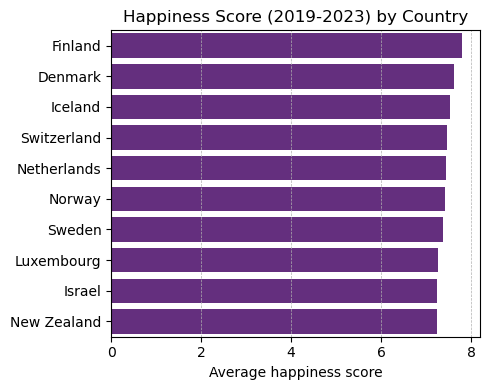

In [18]:
# Plot the data

plt.figure(figsize=(5, 4))
sns.barplot(
    data=top_10_avg_scores,
    x='avg_score',
    y='Country',
    color='#68228B'
)

# Set plot title and labels

plt.title("Happiness Score (2019-2023) by Country")
plt.xlabel("Average happiness score")
plt.ylabel("")

# Apply a clean theme and flip the coordinates

plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Save the plot

fig1 = plt.gcf()
fig1.savefig("avg_happiness_by_country.png", bbox_inches='tight')

In [19]:
# Calculate the average happiness score for each region across all years

avg_region = df_common.groupby('Region')['Happiness_score'].mean().reset_index()

In [20]:
# Rename the column for clarity

avg_region.rename(columns={'Happiness_score': 'avg_score'}, inplace=True)

In [21]:
avg_region

,Region,avg_score
0,Central and Eastern Europe,6.021201
1,Commonwealth of Independent States,5.471029
2,East Asia,5.721965
3,Latin America and Caribbean,6.020177
4,Middle East and North Africa,5.224791
5,North America and ANZ,7.117505
6,South Asia,4.291883
7,Southeast Asia,5.385496
8,Sub-Saharan Africa,4.485741
9,Western Europe,6.942221


In [22]:
# Sort by 'avg_score' in descending order

avg_region = avg_region.sort_values(by='avg_score', ascending=False)
avg_region

,Region,avg_score
5,North America and ANZ,7.117505
9,Western Europe,6.942221
0,Central and Eastern Europe,6.021201
3,Latin America and Caribbean,6.020177
2,East Asia,5.721965
1,Commonwealth of Independent States,5.471029
7,Southeast Asia,5.385496
4,Middle East and North Africa,5.224791
8,Sub-Saharan Africa,4.485741
6,South Asia,4.291883


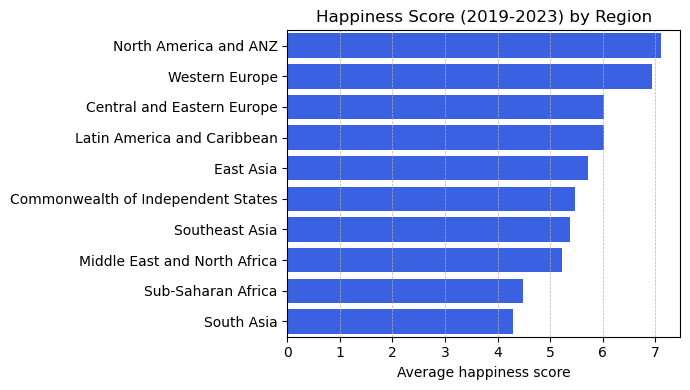

In [23]:
# Plot the data

plt.figure(figsize=(7, 4))
sns.barplot(
    data=avg_region,
    x='avg_score',
    y='Region',
    color='#1F51FF'
)

# Set plot title and labels

plt.title("Happiness Score (2019-2023) by Region")
plt.xlabel("Average happiness score")
plt.ylabel("")

# Apply a clean theme and flip the coordinates

plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Save the plot

fig2 = plt.gcf()
fig2.savefig("avg_happiness_by_region.png", bbox_inches='tight')

### Top 10 most progressive countries from 2019 to 2023

In [24]:
# Pivot the DataFrame to get years as columns

df_pivot = df_common.pivot_table(index='Country', columns='Year', values='Happiness_score').reset_index()
df_pivot

Year,Country,2019,2020,2021,2022,2023
0,Afghanistan,3.203,2.5669,2.523,2.404,1.859
1,Albania,4.719,4.8827,5.117,5.199,5.277
2,Algeria,5.211,5.0051,4.887,5.122,5.329
3,Argentina,6.086,5.9747,5.929,5.967,6.024
4,Armenia,4.559,4.6768,5.283,5.399,5.342
...,...,...,...,...,...,...
127,Uzbekistan,6.174,6.2576,6.179,6.063,6.014
128,Venezuela,4.707,5.0532,4.892,4.925,5.211
129,Vietnam,5.175,5.3535,5.411,5.485,5.763
130,Zambia,4.107,3.7594,4.073,3.760,3.982


In [25]:
# Calculate the percentage increase from 2019 to 2023

df_pivot['Percentage_Increase'] = (df_pivot[2023] - df_pivot[2019]) / df_pivot[2019] * 100

In [26]:
# Select the top 10 countries with the highest percentage increase

top_10_countries = df_pivot.nlargest(10, 'Percentage_Increase')

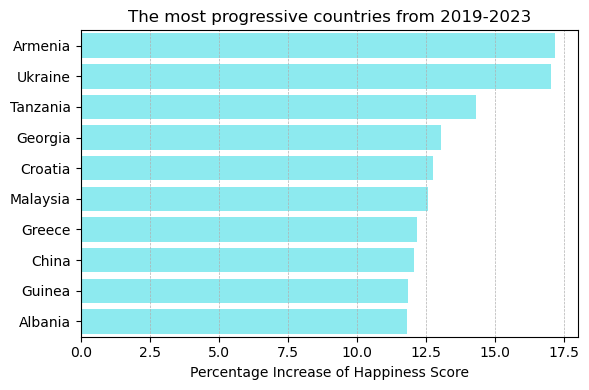

In [27]:
# Plot the results

plt.figure(figsize=(6, 4))
sns.barplot(data=top_10_countries, x='Percentage_Increase', y='Country', color='#7DF9FF', orient='h')

plt.title("The most progressive countries from 2019-2023")
plt.xlabel("Percentage Increase of Happiness Score")
plt.ylabel("")

plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Save the plot

fig3 = plt.gcf()
fig3.savefig("most_progressive_countries.png", bbox_inches='tight')

### Rank move 2019-2023

In [28]:
# Pivot the DataFrame to get years as columns

df_pivot_rank = df_common.pivot_table(index='Country', columns='Year', values='Happiness_rank').reset_index()
df_pivot_rank

Year,Country,2019,2020,2021,2022,2023
0,Afghanistan,154.0,153.0,149.0,146.0,137.0
1,Albania,107.0,105.0,93.0,90.0,83.0
2,Algeria,88.0,100.0,109.0,96.0,81.0
3,Argentina,47.0,55.0,57.0,57.0,52.0
4,Armenia,116.0,116.0,86.0,82.0,79.0
...,...,...,...,...,...,...
127,Uzbekistan,41.0,38.0,42.0,53.0,54.0
128,Venezuela,108.0,99.0,107.0,108.0,88.0
129,Vietnam,94.0,83.0,79.0,77.0,65.0
130,Zambia,138.0,141.0,137.0,137.0,128.0


In [29]:
# Calculate the rank move from 2019 to 2023

df_pivot_rank['Rank move'] = (df_pivot_rank[2019] - df_pivot_rank[2023])

In [30]:
# Sort by 'Rank move' in descending order

rank_var = df_pivot_rank.sort_values(by='Rank move', ascending=False)
rank_var

Year,Country,2019,2020,2021,2022,2023,Rank move
122,Ukraine,133.0,123.0,110.0,98.0,92.0,41.0
4,Armenia,116.0,116.0,86.0,82.0,79.0,37.0
129,Vietnam,94.0,83.0,79.0,77.0,65.0,29.0
40,Georgia,119.0,117.0,108.0,105.0,90.0,29.0
22,China,93.0,94.0,84.0,72.0,64.0,29.0
...,...,...,...,...,...,...,...
31,Ecuador,50.0,58.0,66.0,76.0,74.0,-24.0
120,Turkey,79.0,93.0,104.0,112.0,106.0,-27.0
23,Colombia,43.0,44.0,52.0,66.0,72.0,-29.0
92,Pakistan,67.0,66.0,105.0,121.0,108.0,-41.0


In [31]:
# Select the top 10 movers up the ranking

top_10_movers_up = rank_var.head(10)
top_10_movers_up

Year,Country,2019,2020,2021,2022,2023,Rank move
122,Ukraine,133.0,123.0,110.0,98.0,92.0,41.0
4,Armenia,116.0,116.0,86.0,82.0,79.0,37.0
129,Vietnam,94.0,83.0,79.0,77.0,65.0,29.0
40,Georgia,119.0,117.0,108.0,105.0,90.0,29.0
22,China,93.0,94.0,84.0,72.0,64.0,29.0
52,Iraq,126.0,110.0,111.0,107.0,98.0,28.0
45,Guinea,118.0,102.0,102.0,109.0,91.0,27.0
26,Croatia,75.0,79.0,60.0,47.0,48.0,27.0
82,Mozambique,123.0,120.0,115.0,101.0,97.0,26.0
104,Serbia,70.0,64.0,48.0,43.0,44.0,26.0


Text(0, 0.5, 'Happiness score')

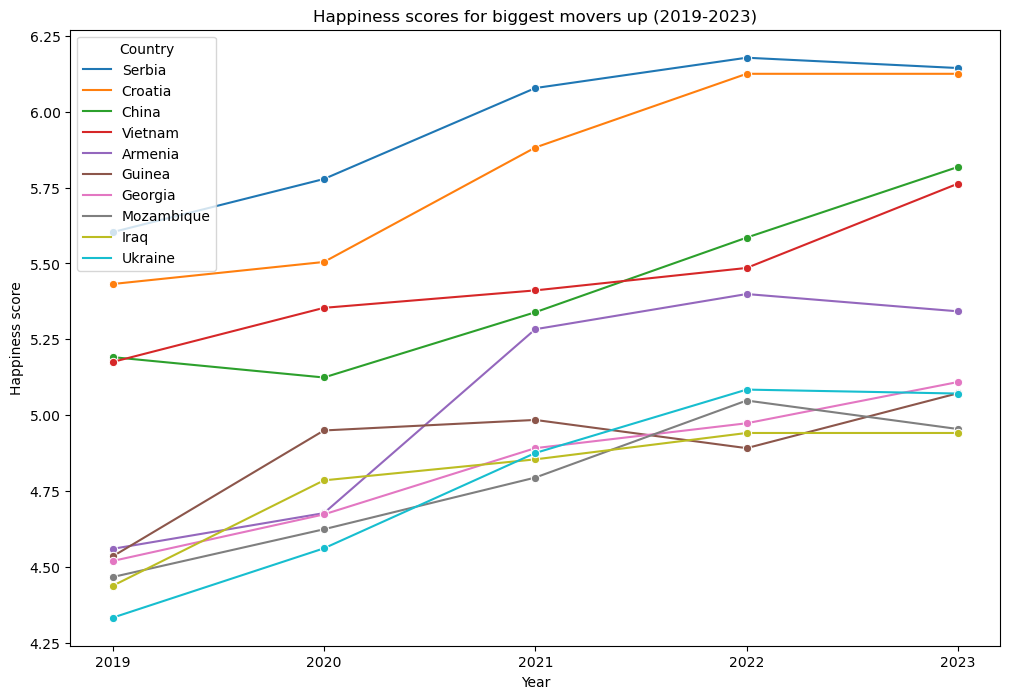

In [32]:
# Plot the evolution of happiness scores for the biggest movers up

plt.figure(figsize=(12, 8))
df_movers_up = df_common[df_common['Country'].isin(top_10_movers_up['Country'])]
df_movers_up['Year'] = df_movers_up['Year'].astype(str)
sns.lineplot(data=df_movers_up, x='Year', y='Happiness_score', hue="Country", marker="o")

plt.title("Happiness scores for biggest movers up (2019-2023)")
plt.xlabel("Year")
plt.ylabel("Happiness score")

In [33]:
# Select the top 10 movers down the ranking

top_10_movers_down = df_pivot_rank.sort_values(by='Rank move', ascending=True).head(10)
top_10_movers_down

Year,Country,2019,2020,2021,2022,2023,Rank move
66,Lebanon,91.0,111.0,123.0,145.0,136.0,-45.0
92,Pakistan,67.0,66.0,105.0,121.0,108.0,-41.0
23,Colombia,43.0,44.0,52.0,66.0,72.0,-29.0
120,Turkey,79.0,93.0,104.0,112.0,106.0,-27.0
31,Ecuador,50.0,58.0,66.0,76.0,74.0,-24.0
59,Jordan,101.0,119.0,127.0,134.0,123.0,-22.0
14,Brazil,32.0,32.0,35.0,38.0,48.0,-16.0
44,Guatemala,27.0,29.0,30.0,39.0,43.0,-16.0
74,Malta,22.0,22.0,23.0,33.0,37.0,-15.0
33,El Salvador,35.0,34.0,49.0,49.0,50.0,-15.0


Text(0, 0.5, 'Happiness score')

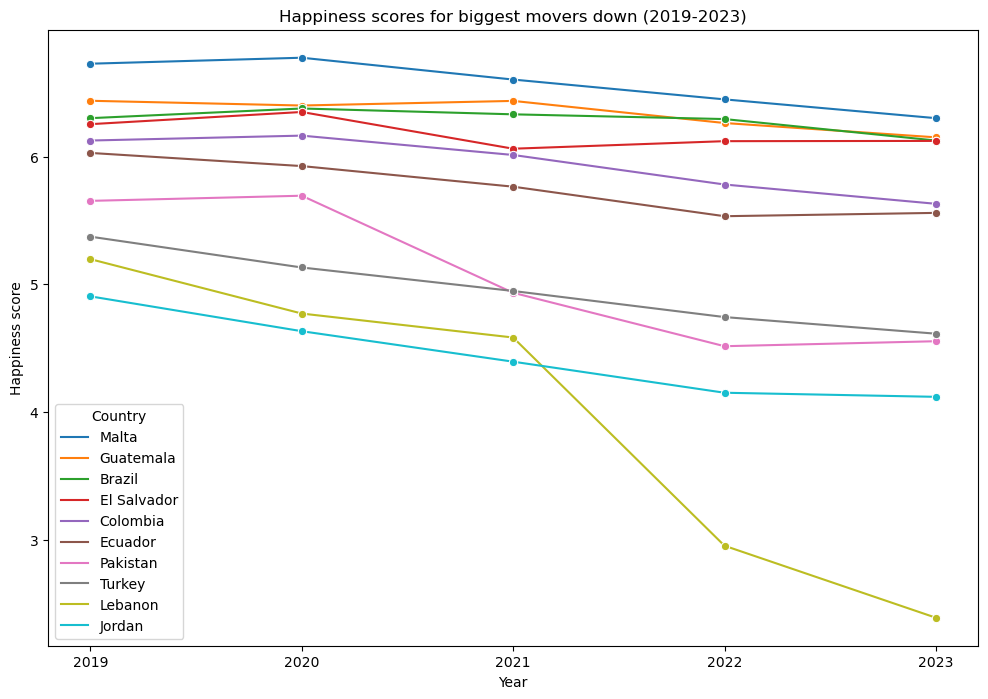

In [34]:
# Plot the evolution of happiness scores for the biggest movers up

plt.figure(figsize=(12, 8))
df_movers_down = df_common[df_common['Country'].isin(top_10_movers_down['Country'])]
df_movers_down['Year'] = df_movers_down['Year'].astype(str)
sns.lineplot(data=df_movers_down, x='Year', y='Happiness_score', hue="Country", marker="o")

plt.title("Happiness scores for biggest movers down (2019-2023)")
plt.xlabel("Year")
plt.ylabel("Happiness score")

In [35]:
# Check ranking variation for each of the top 10 average happiest countries

top_10_rank_move = df_pivot_rank[df_pivot_rank['Country'].isin(top_10_avg_scores['Country'])]

top_10_rank_move = top_10_rank_move.sort_values(by='Rank move', ascending=False)

top_10_rank_move

Year,Country,2019,2020,2021,2022,2023,Rank move
54,Israel,13.0,14.0,12.0,9.0,4.0,9.0
69,Luxembourg,14.0,10.0,8.0,6.0,9.0,5.0
48,Iceland,4.0,4.0,4.0,3.0,3.0,1.0
113,Sweden,7.0,7.0,7.0,7.0,6.0,1.0
29,Denmark,2.0,2.0,2.0,2.0,2.0,0.0
36,Finland,1.0,1.0,1.0,1.0,1.0,0.0
86,Netherlands,5.0,6.0,5.0,5.0,5.0,0.0
87,New Zealand,8.0,8.0,9.0,10.0,10.0,-2.0
114,Switzerland,6.0,3.0,3.0,4.0,8.0,-2.0
91,Norway,3.0,5.0,6.0,8.0,7.0,-4.0


In [36]:
# Check what happened to other variablies to justify the rank variation

df_top_countries = df_common[df_common['Country'].isin(top_10_rank_move['Country'])]
df_top_countries

,Country,Region,Year,Happiness_rank,Happiness_score,GDP_capita,Social_support,Life_expectancy,Freedom,Generosity,Corruption_perception
0,Finland,Western Europe,2019,1,7.7690,1.340000,1.587000,0.986000,0.596000,0.153000,0.393000
1,Denmark,Western Europe,2019,2,7.6000,1.383000,1.573000,0.996000,0.592000,0.252000,0.410000
2,Norway,Western Europe,2019,3,7.5540,1.488000,1.582000,1.028000,0.603000,0.271000,0.341000
3,Iceland,Western Europe,2019,4,7.4940,1.380000,1.624000,1.026000,0.591000,0.354000,0.118000
4,Netherlands,Western Europe,2019,5,7.4880,1.396000,1.522000,0.999000,0.557000,0.322000,0.298000
5,Switzerland,Western Europe,2019,6,7.4800,1.452000,1.526000,1.052000,0.572000,0.263000,0.343000
6,Sweden,Western Europe,2019,7,7.3430,1.387000,1.487000,1.009000,0.574000,0.267000,0.373000
7,New Zealand,North America and ANZ,2019,8,7.3070,1.303000,1.557000,1.026000,0.585000,0.330000,0.380000
12,Israel,Middle East and North Africa,2019,13,7.1390,1.276000,1.455000,1.029000,0.371000,0.261000,0.082000
13,Luxembourg,Western Europe,2019,14,7.0900,1.609000,1.479000,1.012000,0.526000,0.194000,0.316000


In [37]:
df_top_countries.describe()

,Year,Happiness_rank,Happiness_score,GDP_capita,Social_support,Life_expectancy,Freedom,Generosity,Corruption_perception
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,2021.000000,5.800000,7.441156,1.630845,1.368682,0.825137,0.646501,0.230530,0.375211
std,1.428571,3.458205,0.189259,0.288308,0.186852,0.173217,0.080528,0.065330,0.131664
min,2019.000000,1.000000,7.090000,1.216464,1.003000,0.513000,0.371000,0.109000,0.082000
25%,2020.000000,3.000000,7.317250,1.384000,1.209750,0.754750,0.597750,0.189500,0.341500
50%,2021.000000,5.500000,7.431950,1.519338,1.459000,0.796500,0.663658,0.243397,0.411500
75%,2022.000000,8.000000,7.556250,1.920750,1.521000,0.998250,0.699500,0.270750,0.473250
max,2023.000000,14.000000,7.842000,2.209000,1.624000,1.052000,0.772000,0.362330,0.535000


In [38]:
# Pivot the dataframe to check "GDP_capita" variable

df_pivot_top_GDP = df_top_countries.pivot_table(index='Country', columns='Year', values='GDP_capita').reset_index()
df_pivot_top_GDP

Year,Country,2019,2020,2021,2022,2023
0,Denmark,1.383,1.326949,1.502,1.953,1.949
1,Finland,1.340,1.285190,1.446,1.892,1.888
2,Iceland,1.380,1.326502,1.482,1.936,1.926
3,Israel,1.276,1.216464,1.376,1.826,1.833
4,Luxembourg,1.609,1.536676,1.751,2.209,2.200
5,Netherlands,1.396,1.338946,1.501,1.945,1.942
6,New Zealand,1.303,1.242318,1.400,1.852,1.842
7,Norway,1.488,1.424207,1.543,1.997,1.994
8,Sweden,1.387,1.322235,1.478,1.920,1.921
9,Switzerland,1.452,1.390774,1.566,2.026,2.022


Text(0, 0.5, 'GDP per capita')

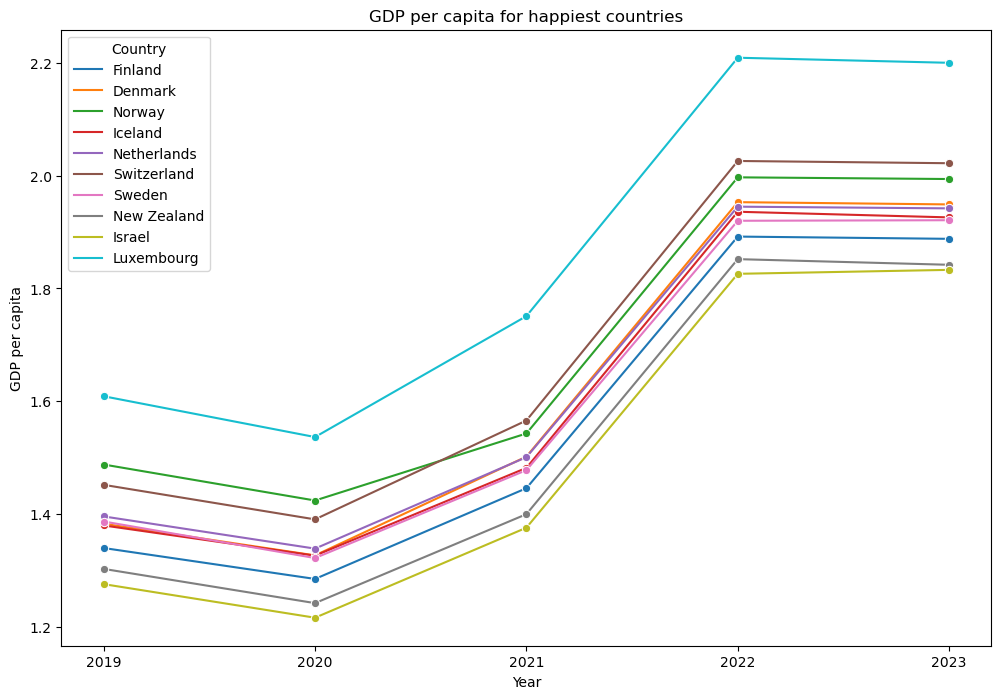

In [39]:
# Plot the trend of the "GDP_capita" variable

plt.figure(figsize=(12, 8))
df_top_countries['Year'] = df_top_countries['Year'].astype(str)
sns.lineplot(data=df_top_countries, x='Year', y='GDP_capita', hue="Country", marker="o")

plt.title("GDP per capita for happiest countries")
plt.xlabel("Year")
plt.ylabel("GDP per capita")

In [40]:
# Calculate the percentage increase of GDP from 2019 to 2023

df_pivot_top_GDP['GDP_%_Increase'] = (df_pivot_top_GDP[2023] - df_pivot_top_GDP[2019]) / df_pivot_top_GDP[2019] * 100
df_pivot_top_GDP

Year,Country,2019,2020,2021,2022,2023,GDP_%_Increase
0,Denmark,1.383,1.326949,1.502,1.953,1.949,40.925524
1,Finland,1.340,1.285190,1.446,1.892,1.888,40.895522
2,Iceland,1.380,1.326502,1.482,1.936,1.926,39.565217
3,Israel,1.276,1.216464,1.376,1.826,1.833,43.652038
4,Luxembourg,1.609,1.536676,1.751,2.209,2.200,36.730889
5,Netherlands,1.396,1.338946,1.501,1.945,1.942,39.111748
6,New Zealand,1.303,1.242318,1.400,1.852,1.842,41.366078
7,Norway,1.488,1.424207,1.543,1.997,1.994,34.005376
8,Sweden,1.387,1.322235,1.478,1.920,1.921,38.500360
9,Switzerland,1.452,1.390774,1.566,2.026,2.022,39.256198


#### All top countries show a positive increase in GDP per capita (34-44%)

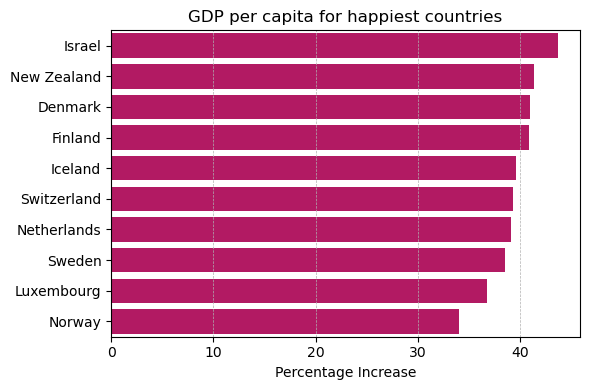

In [41]:
# Plot the percentage increase of GDP from 2019 to 2023

plt.figure(figsize=(6, 4))
df_pivot_top_GDP = df_pivot_top_GDP.sort_values(by='GDP_%_Increase', ascending=False)
sns.barplot(data=df_pivot_top_GDP, x='GDP_%_Increase', y='Country', color='#cb0162', orient='h')

plt.title("GDP per capita for happiest countries")
plt.xlabel("Percentage Increase")
plt.ylabel("")

plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()

In [45]:
# Pivot the dataframe to check "Social_support" variable

df_pivot_top_support = df_top_countries.pivot_table(index='Country', columns='Year', values='Social_support').reset_index()
df_pivot_top_support

Year,Country,2019,2020,2021,2022,2023
0,Denmark,1.573,1.503449,1.108,1.243,1.548
1,Finland,1.587,1.499526,1.106,1.258,1.585
2,Iceland,1.624,1.547567,1.172,1.320,1.620
3,Israel,1.455,1.403257,1.074,1.221,1.521
4,Luxembourg,1.479,1.387528,1.003,1.155,1.357
5,Netherlands,1.522,1.463646,1.079,1.206,1.488
6,New Zealand,1.557,1.487218,1.094,1.235,1.544
7,Norway,1.582,1.495173,1.108,1.239,1.521
8,Sweden,1.487,1.433348,1.062,1.204,1.510
9,Switzerland,1.526,1.472403,1.079,1.226,1.463


In [58]:
# Calculate the percentage increase of "Social_support" from 2019 to 2023

df_pivot_top_support['Social_support_%_Increase'] = (df_pivot_top_support['2023'] - df_pivot_top_support['2019']) / df_pivot_top_support['2019'] * 100
df_pivot_top_support

Year,Country,2019,2020,2021,2022,2023,Social_support_%_Increase
0,Denmark,1.573,1.503449,1.108,1.243,1.548,-1.589320
1,Finland,1.587,1.499526,1.106,1.258,1.585,-0.126024
2,Iceland,1.624,1.547567,1.172,1.320,1.620,-0.246305
3,Israel,1.455,1.403257,1.074,1.221,1.521,4.536082
4,Luxembourg,1.479,1.387528,1.003,1.155,1.357,-8.248817
5,Netherlands,1.522,1.463646,1.079,1.206,1.488,-2.233903
6,New Zealand,1.557,1.487218,1.094,1.235,1.544,-0.834939
7,Norway,1.582,1.495173,1.108,1.239,1.521,-3.855879
8,Sweden,1.487,1.433348,1.062,1.204,1.510,1.546738
9,Switzerland,1.526,1.472403,1.079,1.226,1.463,-4.128440


#### Only Isreal and Sweden show a positive % increase (5% and 2% respectively), while all the other countries show a decrease in social support (0,1-8%).

In [47]:
# Pivot the dataframe to check "Life_expectancy" variable

df_pivot_top_life = df_top_countries.pivot_table(index='Country', columns='Year', values='Life_expectancy').reset_index()
df_pivot_top_life

Year,Country,2019,2020,2021,2022,2023
0,Denmark,0.996,0.979333,0.763,0.777,0.537
1,Finland,0.986,0.961271,0.741,0.775,0.535
2,Iceland,1.026,1.000843,0.772,0.803,0.559
3,Israel,1.029,1.008053,0.788,0.818,0.577
4,Luxembourg,1.012,0.986443,0.760,0.790,0.549
5,Netherlands,0.999,0.975675,0.753,0.787,0.545
6,New Zealand,1.026,1.008138,0.785,0.752,0.513
7,Norway,1.028,1.008072,0.782,0.786,0.544
8,Sweden,1.009,0.986470,0.763,0.803,0.562
9,Switzerland,1.052,1.040533,0.816,0.822,0.582


Text(0, 0.5, 'Life expectancy')

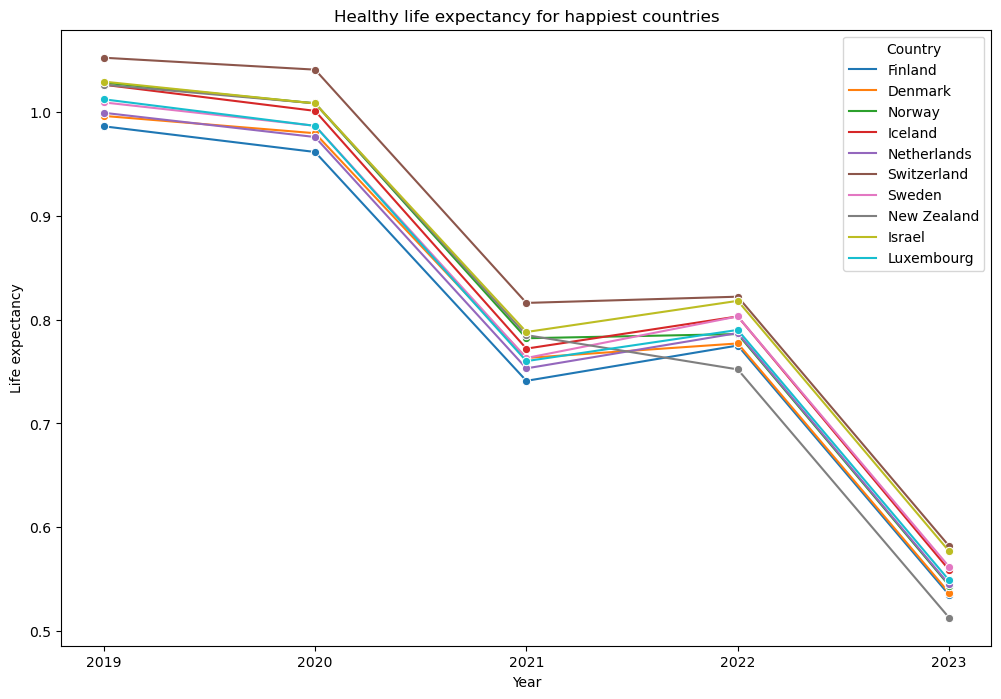

In [48]:
# Plot the trend of the "Life_expectancy" variable

plt.figure(figsize=(12, 8))
df_top_countries['Year'] = df_top_countries['Year'].astype(str)
sns.lineplot(data=df_top_countries, x='Year', y='Life_expectancy', hue="Country", marker="o")

plt.title("Healthy life expectancy for happiest countries")
plt.xlabel("Year")
plt.ylabel("Life expectancy")

In [59]:
# Calculate the percentage increase of "Life_expectancy" from 2019 to 2023

df_pivot_top_life['Life_expectancy_%_Increase'] = (df_pivot_top_life['2023'] - df_pivot_top_life['2019']) / df_pivot_top_life['2019'] * 100
df_pivot_top_life

Year,Country,2019,2020,2021,2022,2023,Life_expectancy_%_Increase
0,Denmark,0.996,0.979333,0.763,0.777,0.537,-46.084337
1,Finland,0.986,0.961271,0.741,0.775,0.535,-45.740365
2,Iceland,1.026,1.000843,0.772,0.803,0.559,-45.516569
3,Israel,1.029,1.008053,0.788,0.818,0.577,-43.926142
4,Luxembourg,1.012,0.986443,0.760,0.790,0.549,-45.750988
5,Netherlands,0.999,0.975675,0.753,0.787,0.545,-45.445445
6,New Zealand,1.026,1.008138,0.785,0.752,0.513,-50.000000
7,Norway,1.028,1.008072,0.782,0.786,0.544,-47.081712
8,Sweden,1.009,0.986470,0.763,0.803,0.562,-44.301288
9,Switzerland,1.052,1.040533,0.816,0.822,0.582,-44.676806


#### All countries show a dramatic drop in life expectancy (44-50%). This is quite surprising.

In [50]:
# Pivot the dataframe to check "Freedom" variable

df_pivot_top_freedom = df_top_countries.pivot_table(index='Country', columns='Year', values='Freedom').reset_index()
df_pivot_top_freedom

Year,Country,2019,2020,2021,2022,2023
0,Denmark,0.592,0.665040,0.686,0.719,0.734
1,Finland,0.596,0.662317,0.691,0.736,0.772
2,Iceland,0.591,0.661981,0.698,0.718,0.738
3,Israel,0.371,0.420699,0.509,0.568,0.569
4,Luxembourg,0.526,0.610137,0.639,0.700,0.710
5,Netherlands,0.557,0.613626,0.647,0.651,0.672
6,New Zealand,0.585,0.646790,0.665,0.680,0.672
7,Norway,0.603,0.670201,0.703,0.728,0.752
8,Sweden,0.574,0.650298,0.685,0.724,0.754
9,Switzerland,0.572,0.628954,0.653,0.677,0.678


Text(0, 0.5, 'Freedom')

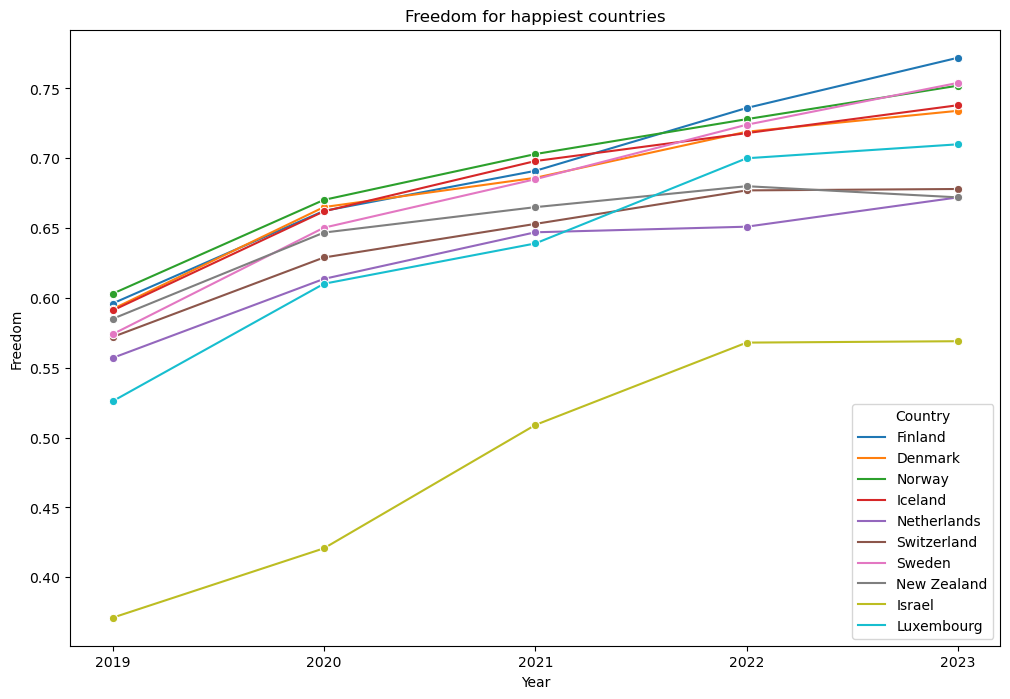

In [51]:
# Plot the trend of the "Freedom" variable

plt.figure(figsize=(12, 8))
df_top_countries['Year'] = df_top_countries['Year'].astype(str)
sns.lineplot(data=df_top_countries, x='Year', y='Freedom', hue="Country", marker="o")

plt.title("Freedom for happiest countries")
plt.xlabel("Year")
plt.ylabel("Freedom")

In [60]:
# Calculate the percentage increase of "Freedom" from 2019 to 2023

df_pivot_top_freedom['Freedom_%_Increase'] = (df_pivot_top_freedom['2023'] - df_pivot_top_freedom['2019']) / df_pivot_top_freedom['2019'] * 100
df_pivot_top_freedom

Year,Country,2019,2020,2021,2022,2023,Freedom_%_Increase
0,Denmark,0.592,0.665040,0.686,0.719,0.734,23.986486
1,Finland,0.596,0.662317,0.691,0.736,0.772,29.530201
2,Iceland,0.591,0.661981,0.698,0.718,0.738,24.873096
3,Israel,0.371,0.420699,0.509,0.568,0.569,53.369272
4,Luxembourg,0.526,0.610137,0.639,0.700,0.710,34.980989
5,Netherlands,0.557,0.613626,0.647,0.651,0.672,20.646320
6,New Zealand,0.585,0.646790,0.665,0.680,0.672,14.871795
7,Norway,0.603,0.670201,0.703,0.728,0.752,24.709784
8,Sweden,0.574,0.650298,0.685,0.724,0.754,31.358885
9,Switzerland,0.572,0.628954,0.653,0.677,0.678,18.531469


#### All countries show a positive increase in freedom (18-35%), with an exeptional increase of +53% for Israel. I'm very curious to know how Isreal will perform in 2024, especially considering the war with Palestina going on at the present time.

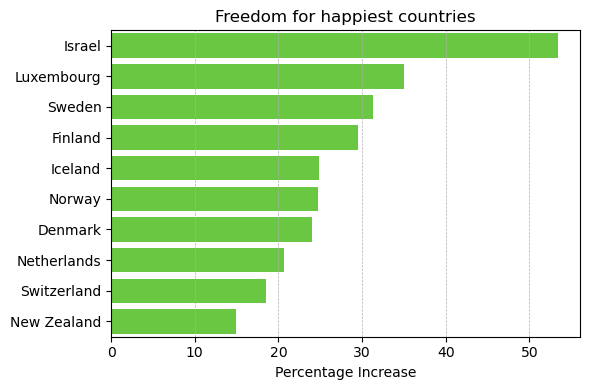

In [64]:
# Plot the percentage increase of freedom from 2019 to 2023

plt.figure(figsize=(6, 4))
df_pivot_top_freedom = df_pivot_top_freedom.sort_values(by='Freedom_%_Increase', ascending=False)
sns.barplot(data=df_pivot_top_freedom, x='Freedom_%_Increase', y='Country', color='#61de2a', orient='h')

plt.title("Freedom for happiest countries")
plt.xlabel("Percentage Increase")
plt.ylabel("")

plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()

In [53]:
# Pivot the dataframe to check "Generosity" variable

df_pivot_top_generosity = df_top_countries.pivot_table(index='Country', columns='Year', values='Generosity').reset_index()
df_pivot_top_generosity

Year,Country,2019,2020,2021,2022,2023
0,Denmark,0.252,0.242793,0.208,0.188,0.208
1,Finland,0.153,0.159670,0.124,0.109,0.126
2,Iceland,0.354,0.362330,0.293,0.270,0.250
3,Israel,0.261,0.266862,0.208,0.155,0.124
4,Luxembourg,0.194,0.195954,0.166,0.120,0.149
5,Netherlands,0.322,0.336318,0.302,0.271,0.251
6,New Zealand,0.330,0.325726,0.276,0.245,0.230
7,Norway,0.271,0.287985,0.249,0.217,0.212
8,Sweden,0.267,0.272828,0.244,0.218,0.225
9,Switzerland,0.263,0.269056,0.204,0.147,0.151


In [61]:
# Calculate the percentage increase of "Generosity" from 2019 to 2023

df_pivot_top_generosity['Generosity_%_Increase'] = (df_pivot_top_generosity['2023'] - df_pivot_top_generosity['2019']) / df_pivot_top_generosity['2019'] * 100
df_pivot_top_generosity

Year,Country,2019,2020,2021,2022,2023,Generosity_%_Increase
0,Denmark,0.252,0.242793,0.208,0.188,0.208,-17.460317
1,Finland,0.153,0.159670,0.124,0.109,0.126,-17.647059
2,Iceland,0.354,0.362330,0.293,0.270,0.250,-29.378531
3,Israel,0.261,0.266862,0.208,0.155,0.124,-52.490421
4,Luxembourg,0.194,0.195954,0.166,0.120,0.149,-23.195876
5,Netherlands,0.322,0.336318,0.302,0.271,0.251,-22.049689
6,New Zealand,0.330,0.325726,0.276,0.245,0.230,-30.303030
7,Norway,0.271,0.287985,0.249,0.217,0.212,-21.771218
8,Sweden,0.267,0.272828,0.244,0.218,0.225,-15.730337
9,Switzerland,0.263,0.269056,0.204,0.147,0.151,-42.585551


#### All countries show a general decrease in generosity (16-43%), with an exeptional -52% for Israel. It is important to keep in account that the max value for this variable is 0,36 - very small compared to other variables, therefore the % variation is not so significant.

In [55]:
# Pivot the dataframe to check "Corruption_perception" variable

df_pivot_top_corruption = df_top_countries.pivot_table(index='Country', columns='Year', values='Corruption_perception').reset_index()
df_pivot_top_corruption

Year,Country,2019,2020,2021,2022,2023
0,Denmark,0.410,0.495260,0.485,0.532,0.525
1,Finland,0.393,0.477857,0.481,0.534,0.535
2,Iceland,0.118,0.144541,0.170,0.191,0.187
3,Israel,0.082,0.099898,0.119,0.143,0.158
4,Luxembourg,0.316,0.367041,0.353,0.388,0.418
5,Netherlands,0.298,0.368570,0.384,0.419,0.394
6,New Zealand,0.380,0.461268,0.445,0.483,0.471
7,Norway,0.341,0.434101,0.427,0.474,0.463
8,Sweden,0.373,0.442066,0.448,0.512,0.520
9,Switzerland,0.343,0.407946,0.413,0.461,0.475


Text(0, 0.5, 'Corruption perception')

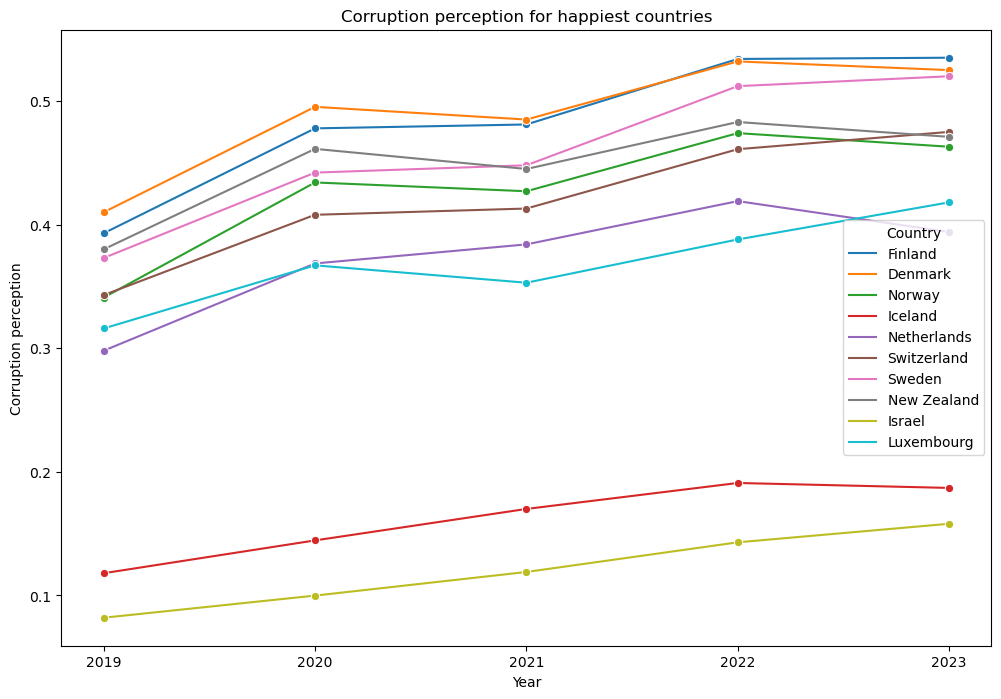

In [56]:
# Plot the trend of the "Corruption_perception" variable

plt.figure(figsize=(12, 8))
df_top_countries['Year'] = df_top_countries['Year'].astype(str)
sns.lineplot(data=df_top_countries, x='Year', y='Corruption_perception', hue="Country", marker="o")

plt.title("Corruption perception for happiest countries")
plt.xlabel("Year")
plt.ylabel("Corruption perception")

In [62]:
# Calculate the percentage increase of "Corruption_perception" from 2019 to 2023

df_pivot_top_corruption['Corruption_perception_%_Increase'] = (df_pivot_top_corruption['2023'] - df_pivot_top_corruption['2019']) / df_pivot_top_corruption['2019'] * 100
df_pivot_top_corruption

Year,Country,2019,2020,2021,2022,2023,Corruption_perception_%_Increase
0,Denmark,0.410,0.495260,0.485,0.532,0.525,28.048780
1,Finland,0.393,0.477857,0.481,0.534,0.535,36.132316
2,Iceland,0.118,0.144541,0.170,0.191,0.187,58.474576
3,Israel,0.082,0.099898,0.119,0.143,0.158,92.682927
4,Luxembourg,0.316,0.367041,0.353,0.388,0.418,32.278481
5,Netherlands,0.298,0.368570,0.384,0.419,0.394,32.214765
6,New Zealand,0.380,0.461268,0.445,0.483,0.471,23.947368
7,Norway,0.341,0.434101,0.427,0.474,0.463,35.777126
8,Sweden,0.373,0.442066,0.448,0.512,0.520,39.410188
9,Switzerland,0.343,0.407946,0.413,0.461,0.475,38.483965


#### All countries show a dramatic increase in corruption perception (28-58%), with an exeptional +93% for Israel. This is quite surprising.

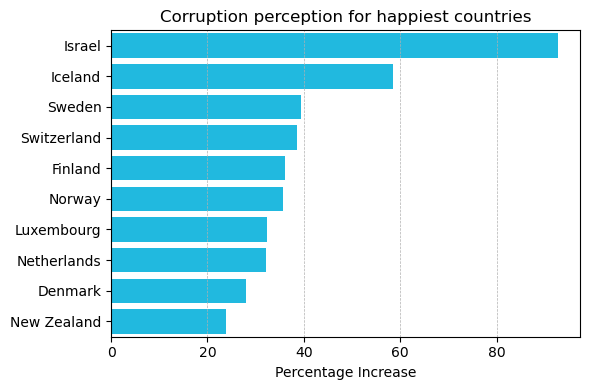

In [63]:
# Plot the percentage increase of corruption perception from 2019 to 2023

plt.figure(figsize=(6, 4))
df_pivot_top_corruption = df_pivot_top_corruption.sort_values(by='Corruption_perception_%_Increase', ascending=False)
sns.barplot(data=df_pivot_top_corruption, x='Corruption_perception_%_Increase', y='Country', color='#02ccfe', orient='h')

plt.title("Corruption perception for happiest countries")
plt.xlabel("Percentage Increase")
plt.ylabel("")

plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()